In [1]:
pip install -q seaborn scikit-learn xgboost statsmodels scipy openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vecstack

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.10.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
#from catboost import CatBoostRegressor
from tensorflow import keras
import statsmodels.api as sm
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from vecstack import stacking
from sklearn.neural_network import MLPRegressor
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from vecstack import stacking
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split, KFold
from tensorflow.estimator import DNNRegressor
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import kstest
import matplotlib.gridspec as gridspec
import random
import scipy
from scipy.stats import multivariate_normal
from matplotlib.ticker import AutoMinorLocator
import csv
import scipy.integrate as si
import math
si.dps = 50
from pylab import *
from scipy import *
import scipy.constants as const
from scipy import optimize
import matplotlib as mpl

2025-07-14 19:04:33.509129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-14 19:04:34.529357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-14 19:04:34.529409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-07-14 19:04:34.614617: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-14 19:04:35.953895: W tensorflow/stream_executor/platform/de

In [5]:
font = {'family' : 'serif',
        'weight' : 'bold','size': 15}
matplotlib.rc('font',**font)
matplotlib.rc('grid',linewidth=4)
matplotlib.rc('xtick.major',width=4)
matplotlib.rc('xtick.major',size=10)
matplotlib.rc('xtick.minor',width=3)
matplotlib.rc('xtick.minor',size=4)
matplotlib.rc('ytick.major',width=3)
matplotlib.rc('ytick.major',size=8)
matplotlib.rc('ytick.minor',width=3)
matplotlib.rc('ytick.minor',size=5)
mpl.rcParams['axes.linewidth'] = 3.5
fig = plt.figure(1,figsize=(15.5,12))
subplots_adjust(hspace=0.5)

<Figure size 1550x1200 with 0 Axes>

In [6]:
#dataset

# Load the Band Fluence dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Adrita-Khan/GRB-ML/main/Data/kw_band_flc.xlsx'
GBM_df = pd.read_excel(url)

# Specify the columns to extract
Columns = ['Redshift', 'T90', 'Alpha', 'Beta', 'Ep', 'Sbolo']
GBM_df = GBM_df[Columns]

# Apply a base-10 log transformation on selected columns
log = np.log10(GBM_df[['T90', 'Ep', 'Sbolo']])

# Extract Alpha and Beta spectral indices (not log-transformed)
Alpha_flc = GBM_df['Alpha']
Beta_flc = GBM_df['Beta']

# Add Alpha and Beta to the log dataframe
log['Alpha_flc'] = Alpha_flc
log['Beta_flc'] = Beta_flc

# Define predictors
predictors = log

# Define the target (output) column
target = 'Redshift'

# Prepare the final input (X) and output (y) datasets for modeling
Data_X = log
Data_y = GBM_df['Redshift']

# Check the length of the dataset
print(len(Data_y))


56


In [7]:
# ------------------------------------------------------
# Step 1: Split data into training and testing sets
# ------------------------------------------------------

# X = input features, y = target/output
# test_size=0.3 means 30% of the data will be used for testing, 70% for training
# random_state of the split
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_y, test_size=0.3, random_state=42)

# ------------------------------------------------------
# Step 2: Feature scaling using StandardScaler
# ------------------------------------------------------

# Initialize a StandardScaler (z-score normalization: (x - mean) / std)
scaler = StandardScaler()

# Fit the scaler to the training data and apply the transformation
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data (using the parameters from training data)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------
# Step 3: Convert scaled arrays back to DataFrames with named columns
# ------------------------------------------------------

# columns names will be as 'feature_0', 'feature_1', ...
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['feature_{}'.format(i) for i in range(X_train.shape[1])])

# Same for test set
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['feature_{}'.format(i) for i in range(X_test.shape[1])])

# Create TensorFlow feature columns for each input column in the training set
# These are used to define how input features are represented in a model
feature_columns = [tf.feature_column.numeric_column(column) for column in X_train_scaled.columns]

In [8]:
# ---------------------------------------------
# Define a list of DNNRegressor models for stacking
# ---------------------------------------------

models = [

    # Model 1: A simple deep neural network with 2 hidden layers
    tf.estimator.DNNRegressor(
        feature_columns=feature_columns,              # Input feature columns
        activation_fn=tf.nn.relu,                     # Activation function: ReLU
        loss_reduction='sum_over_batch_size',         # Loss calculated over batch
        hidden_units=[64, 50],                        # 2 hidden layers with 64 and 50 neurons
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),  # Stochastic Gradient Descent optimizer
    ),

    # Model 2: A deeper network with 3 hidden layers
    tf.estimator.DNNRegressor(
        feature_columns=feature_columns,
        activation_fn=tf.nn.relu,
        loss_reduction='sum_over_batch_size',
        hidden_units=[128, 64, 32],                   # 3 hidden layers
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    ),

    # Model 3: An even deeper and wider network with 4 hidden layers
    tf.estimator.DNNRegressor(
        feature_columns=feature_columns,
        activation_fn=tf.nn.relu,
        loss_reduction='sum_over_batch_size',
        hidden_units=[141, 77, 83, 66],               # 4 hidden layers with varied units
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    ),

    # Model 4: A deeper model with 5 hidden layers
    tf.estimator.DNNRegressor(
        feature_columns=feature_columns,
        activation_fn=tf.nn.relu,
        loss_reduction='sum_over_batch_size',
        hidden_units=[156, 85, 42, 30, 22],           # 5 hidden layers with decreasing size
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    ),

]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx882m877', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir'

In [9]:
# ---------------------------------------------
# List to store predictions from each model
# ---------------------------------------------
predictions_train = []

# ---------------------------------------------
# Loop over each model in the ensemble
# ---------------------------------------------
for model in models:

    # Define input function for training and prediction
    def input_fn(features, labels, shuffle=True, batch_size=120):
        # Convert features (DataFrame) and labels into a TensorFlow Dataset
        dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

        # Shuffle the dataset for training if required
        if shuffle:
            dataset = dataset.shuffle(buffer_size=len(features))

        # Group the data into batches
        dataset = dataset.batch(batch_size)
        return dataset

    # ------------------------
    # Train the model
    # ------------------------
    model.train(
        input_fn=lambda: input_fn(X_train_scaled, y_train),  # Training input
        steps=5000                                            # Number of training steps (iterations)
    )

    # ------------------------
    # Predict on training data
    # ------------------------
    prediction_train = model.predict(
        input_fn=lambda: input_fn(X_train_scaled, y_train, shuffle=False, batch_size=100)  # Use same data, no shuffling
    )

    # Extract predictions and append to the list
    predictions_train.append([p['predictions'][0] for p in prediction_train])

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


2025-07-14 19:04:38.581403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-14 19:04:38.582669: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-14 19:04:38.582724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cs-01k054zj1jgqjrqbt3qbmndk6x): /proc/driver/nvidia/version does not exist


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.


2025-07-14 19:04:39.106687: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-14 19:04:39.128324: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2025-07-14 19:04:39.153905: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT64
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
  

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpx882m877/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 10.950807, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpx882m877/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...
INFO:tensorflow:Loss for final step: 10.950807.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx882m877/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INF

In [10]:
# ---------------------------------------------
# Prepare input features for the meta-model
# ---------------------------------------------
# Combine predictions from all base models
# Each column is the prediction from one base model
meta_features_train = np.column_stack(predictions_train)

# ---------------------------------------------
# Define the meta-model (final estimator)
# ---------------------------------------------

final_estimator = RandomForestRegressor()  # You could also use LinearRegression, Ridge, etc.

# ---------------------------------------------
# Train the meta-model on the meta-features
# ---------------------------------------------
# y_train is the true target, meta_features_train is the new input
final_estimator.fit(meta_features_train, y_train)

RandomForestRegressor()

In [11]:
# ---------------------------------------------
# Predict using the stacked model
# ---------------------------------------------
# Final predictions are based on base model outputs
stacked_predictions_train = final_estimator.predict(meta_features_train)

# Mean Squared Error (lower is better)
mse_train = mean_squared_error(y_train, stacked_predictions_train)
print('Mean Squared Error - Train:', mse_train)

Mean Squared Error - Train: 0.6853671410763592


In [12]:
# -------------------------------------------------
# Predict on the test set using each trained model
# -------------------------------------------------

# List to store the predictions from each base model
predictions = []

In [13]:
# Loop over each trained base model
for model in models:

    # Define input function for prediction
    def input_fn(features, shuffle=True, batch_size=160):
        # Convert features (a DataFrame) into a TensorFlow Dataset
        dataset = tf.data.Dataset.from_tensor_slices(dict(features))

        # Shuffle if required (not needed for prediction, so usually set to False)
        if shuffle:
            dataset = dataset.shuffle(buffer_size=len(features))

        # Batch the data
        dataset = dataset.batch(batch_size)
        return dataset

    # Use the trained model to make predictions on the test data
    prediction = model.predict(
        input_fn=lambda: input_fn(X_test_scaled, shuffle=False, batch_size=160)
    )

    # Extract scalar predictions and append to the list
    predictions.append([p['predictions'][0] for p in prediction])

# ---------------------------------------------------------
# Step 1: Stack predictions from base models as meta-features
# ---------------------------------------------------------

# np.column_stack turns this into a 2D array of shape [n_samples, n_models]
meta_features = np.column_stack(predictions)

# ---------------------------------------------------------
# Step 2: Use the meta-model (already trained on train data) to make predictions
# ---------------------------------------------------------

# Re-train the meta-model on the test meta-features and true y_test labels
final_estimator.fit(meta_features, y_test)

# Predict using the stacking ensemble on test set
stacked_predictions = final_estimator.predict(meta_features)

# Mean Squared Error (lower is better)
mse = mean_squared_error(y_test, stacked_predictions)
print('Mean Squared Error - Test:', mse)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx882m877/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoy780t0k/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5zp2csoe/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl8a104jc/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mean Squared Error - Test: 0.38287460872811624


In [14]:
# -------------------------------------------------------------
# Evaluate performance of the stacked model on training data
# -------------------------------------------------------------

# Compute:
# RMSE: Root Mean Squared Error (sensitive to large errors)
# MAE: Mean Absolute Error (average of absolute differences)
# R²: Coefficient of determination (how well the predictions explain variance)
rmse  = np.sqrt(mean_squared_error(y_train, stacked_predictions_train))  # Root Mean Squared Error
mae   = mean_absolute_error(y_train, stacked_predictions_train)          # Mean Absolute Error
score = r2_score(y_train, stacked_predictions_train) 
# -------------------------------------------------------------
# Print formatted results
# -------------------------------------------------------------
print("R2_Train: %5.3f, RMSE: %5.3f, MAE: %5.3f" % (score, rmse, mae))
                    # R² Score

R2_Train: 0.782, RMSE: 0.828, MAE: 0.529


In [15]:
# -------------------------------------------------------------
# Evaluate performance of the stacked model on test data
# -------------------------------------------------------------

rmse  = np.sqrt(mean_squared_error(y_test, stacked_predictions))
mae   = mean_absolute_error(y_test, stacked_predictions)
score = r2_score(y_test, stacked_predictions)

print("R2_Test: %5.3f, RMSE: %5.3f, MAE: %5.3f" % (score, rmse, mae))

# This DataFrame for the Train data
Train = pd.DataFrame({
    'Actual Train': y_train,                      #  true labels
    'Predicted Train': stacked_predictions_train  # Predictions lables
})


# This DataFrame for the Test data

Test = pd.DataFrame({
    'Actual Test': y_test,                        #  true test labels
    'Predicted Test': stacked_predictions         # predictions test lables
})

# Datasets for ploting: data1 is training data, data2 is testing data
data1 = Train
data2 = Test

R2_Test: 0.862, RMSE: 0.619, MAE: 0.505


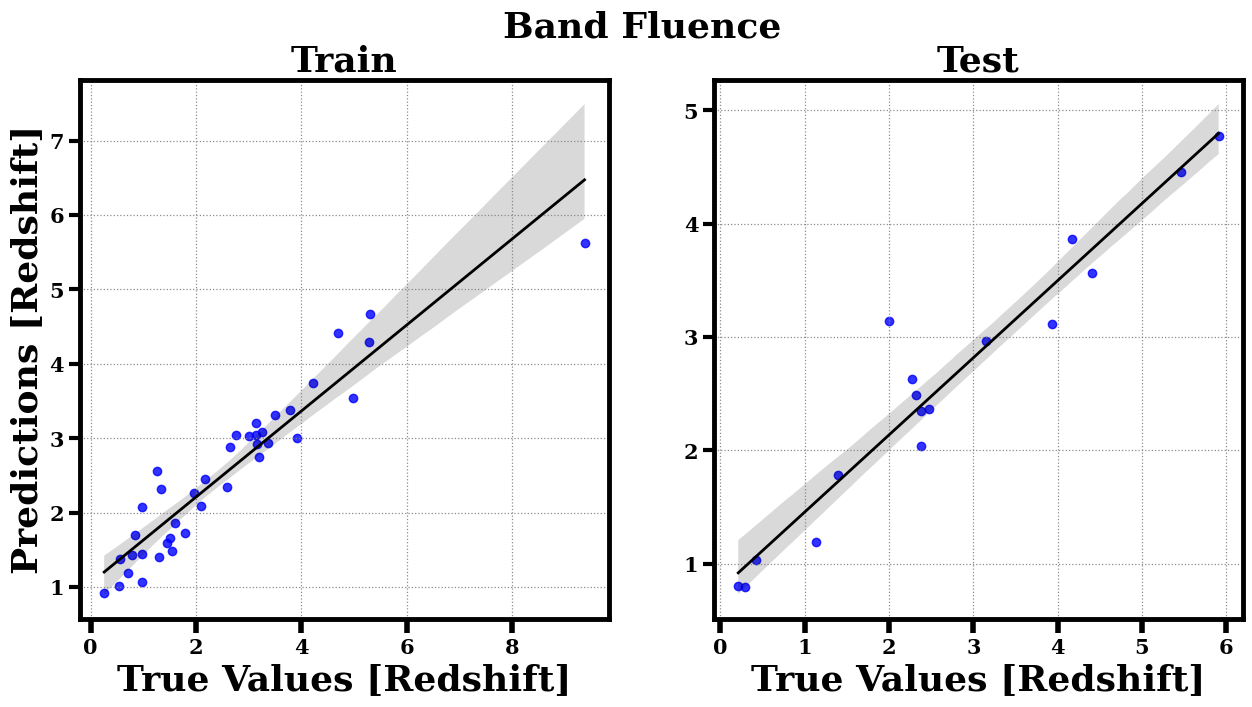

In [16]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot for training data (left subplot)
sns.regplot(
    x='Actual Train',             # true redshift from training data
    y='Predicted Train',          # predicted redshift from training data
    data=data1,
    ax=axes[0],
    color='k',
    scatter_kws={'color': 'blue'},
    line_kws={'linewidth': 2}
)
axes[0].set_title('Train', fontweight="bold", fontsize=26)
axes[0].set_xlabel("True Values [Redshift]", fontweight="bold", fontsize=26)
axes[0].set_ylabel("Predictions [Redshift]", fontweight="bold", fontsize=26)

# grid
axes[0].grid(visible=True, which='both', color='gray', linestyle=':', linewidth=0.9, alpha=0.9)

# Plot for testing data (right subplot)
sns.regplot(
    x="Actual Test",            # true redshift from test data
    y="Predicted Test",         # predicted redshift from test data
    data=data2,
    ax=axes[1],
    color='k',
    scatter_kws={'color': 'blue'},
    line_kws={'linewidth': 2}
)
axes[1].set_title('Test', fontweight="bold", fontsize=26)
axes[1].set_xlabel("True Values [Redshift]", fontweight="bold", fontsize=26)
axes[1].set_ylabel("")

# grid
axes[1].grid(visible=True, which='both', color='gray', linestyle=':', linewidth=0.9, alpha=0.9)

# Super title for the whole figure
fig.suptitle("Band Fluence", fontweight="bold", fontsize=26)

plt.savefig("DNN_Estimator_Band_Fluence.png")

# Display the plot
plt.show()

In [21]:
#replacing this

# Next step: Apply the model to unseen (new) data not used during training

# Load all GBM dataset: I have dropout the high errors in this data set before
# Band_flc = pd.read_csv('https://github.com/Adrita-Khan/GRB-ML/blob/main/Data/kw_band_flc_flx.xlsx')
# # Remove any rows with missing values
# Band_flc = Band_flc.dropna()
# # To keep Long GRBs only
# Band_flc = Band_flc[Band_flc['t90'] >= 2.1]
# # Remove any rows with high Beta
# Band_flc = Band_flc[Band_flc['flnc_band_beta'] <= -2]
# # Apply log10
# log = np.log10(Band_flc[['t90','flnc_band_epeak','flnc_band_ergflnc']])
# # Extract the spectral indices (alpha, beta) — not log-transformed
# Alpha_flc = Band_flc['flnc_band_alpha']
# Beta_flc = Band_flc['flnc_band_beta']
# log['Alpha_flc'] = Alpha_flc
# log['Beta_flc'] = Beta_flc
# # Apply scaling
# log = scaler.fit_transform(log)
# # New data will be:
# NewData  = pd.DataFrame(log, columns=['feature_{}'.format(i) for i in range(log.shape[1])])


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Load the dataset (correcting the file format)
url = 'https://github.com/Adrita-Khan/GRB-ML/raw/main/Data/kw_band_flc_flx.xlsx'
Band_flc = pd.read_excel(url)  # Use read_excel since the file is an Excel file

# Remove any rows with missing values
Band_flc = Band_flc.dropna()

# To keep only Long GRBs (T90 >= 2.1)
Band_flc = Band_flc[Band_flc['T90'] >= 2.1]

# Remove rows with high Beta (Beta <= -2)
Band_flc = Band_flc[Band_flc['Beta'] <= -2]

# Apply log10 transformation to specific columns
log = np.log10(Band_flc[['T90', 'Ep', 'Sbolo']])

# Extract the spectral indices (Alpha, Beta) — not log-transformed
Alpha_flc = Band_flc['Alpha']
Beta_flc = Band_flc['Beta']

# Add Alpha and Beta to the log-transformed DataFrame
log['Alpha_flc'] = Alpha_flc
log['Beta_flc'] = Beta_flc

# Apply scaling
log_scaled = scaler.fit_transform(log)

# Prepare the new data as a DataFrame with proper column names
NewData = pd.DataFrame(log_scaled, columns=['feature_{}'.format(i) for i in range(log_scaled.shape[1])])

# Show the first few rows of the NewData to verify
print(NewData.head())

   feature_0  feature_1  feature_2  feature_3  feature_4
0   0.146459   0.181444   0.793127   2.308865  -2.253885
1   0.390799  -1.503693  -0.745042   2.523430   0.760347
2  -1.719737   0.477748   1.235768  -1.243376   0.271552
3   1.249995   1.537498  -0.527411  -0.671203   0.217242
4   1.369819  -0.728942  -2.451326   1.474446  -0.488794


In [24]:
predictions_red = []
for model in models:
    def input_fn(features, shuffle=True, batch_size=160):
        dataset = tf.data.Dataset.from_tensor_slices(dict(features))
        if shuffle:
            dataset = dataset.shuffle(buffer_size=len(features))
        dataset = dataset.batch(batch_size)
        return dataset

    # Make predictions on New Data
    prediction_red = model.predict(input_fn=lambda: input_fn(NewData, shuffle=False, batch_size=160))
    predictions_red.append([p['predictions'][0] for p in prediction_red])

meta_fea = np.column_stack(predictions_red)

pseudo_red = final_estimator.predict(meta_fea)

len(Data_y) , len(pseudo_red)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx882m877/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoy780t0k/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5zp2csoe/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl8a104jc/model.ckpt-1
INFO:tensorflow:Running

(56, 78)

In [26]:
# Append pseudo-redshifts to the complete Band flc dataset
Band_flc['pseudo_redshift'] = pseudo_red

# Export to CSV file
Band_flc.to_csv('pseudo_redshift_bandflc.csv', index=False)

# Check pseudo redshift ranges
pseudo_red.min(), pseudo_red.max()

# Check true redshift ranges
Data_y.min(), Data_y.max()

(0.211, 9.38)

Kolmogorov-Smirnov Test p-value Band Fluence: 0.33559098126008213


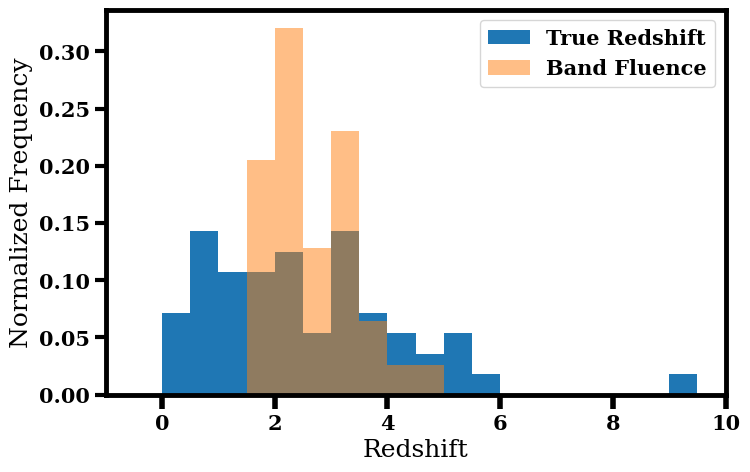

In [27]:
# Define custom histogram bin edges for redshift
xbin = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.6, 9, 9.5]

# Create a normalized histogram of the true redshifts
heights, edges = np.histogram(Data_y, bins = xbin)
heights = heights/heights.sum()
heights.sum()

# Compute the bin centers for plotting
binCenters = (edges[:-1] + edges[1:])/2

# Create a normalized histogram of predicted redshifts (pseudo_red)
heights1, edges = np.histogram(pseudo_red, bins = xbin)
heights1 = heights1/heights1.sum()
heights1.sum()

# Plot both histograms
plt.figure(figsize=(8, 5))
plt.bar(binCenters, heights, width = 0.5, label='True Redshift')
plt.bar(binCenters, heights1, alpha = 0.5, width = 0.5, label='Band Fluence')
plt.xlabel('Redshift', fontsize=18, fontweight='normal')
plt.ylabel('Normalized Frequency', fontsize=18, fontweight='normal')
plt.legend()

# Apply Kolmogorov–Smirnov test to compare the two normalized redshit values: close to one is best
_, p_value = kstest(heights, heights1)
print('Kolmogorov-Smirnov Test p-value Band Fluence:', p_value)